Ejercicios de grafos. Del .mat file de coativation_matrix, realizar los siguientes ejercicios: 

In [24]:
import pandas as pd
import scipy.io

mat_path = r"C:\Users\aliss\Documents\Repo_modelos\pythonProject\TAREAS\Coactivation_matrix.mat"

mat_json = scipy.io.loadmat(mat_path)
data = mat_json
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

1. Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas

In [3]:
df = pd.DataFrame(data)
df.index = df.index + 1  #índices desde 1 
df.columns = df.columns + 1  #columnas desde 1 
print(df)

          1         2         3         4         5        6         7    \
1    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
2    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
3    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
5    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
634  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
635  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
636  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
637  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
638  0.101124  0.069231  0.000000  0.000000  0.053279  0.00000  0.000000   

          8    9         10   ...  629       630  631  632       633  \
1    0.000000  

2. Mostrar el heatmap de coactivation_matrix

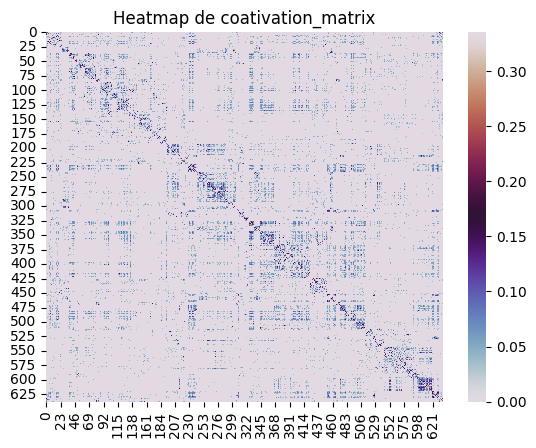

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data, cmap='twilight')
plt.title('Heatmap de coativation_matrix')

plt.show()

3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30.

In [8]:
df = pd.DataFrame(data)

#establecemos el rango de nuestro dataframe inicial al dataframe subconjunto
subset = df.iloc[9:30, 9:30] 

#Para evitar el cero-indexado que toma iloc:
subset.index = range(10,31)
subset.columns = range(10,31)
print(subset)

          10        11        12        13        14        15        16  \
10  0.000000  0.054299  0.145251  0.000000  0.103286  0.000000  0.000000   
11  0.054299  0.000000  0.075000  0.035556  0.000000  0.000000  0.140940   
12  0.145251  0.075000  0.000000  0.000000  0.000000  0.053435  0.059701   
13  0.000000  0.035556  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.103286  0.000000  0.000000  0.000000  0.000000  0.043478  0.055215   
15  0.000000  0.000000  0.053435  0.000000  0.043478  0.000000  0.000000   
16  0.000000  0.140940  0.059701  0.000000  0.055215  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.036697  0.034398  0.000000  0.000000   
18  0.068627  0.107784  0.000000  0.033175  0.087209  0.034247  0.115108   
19  0.000000  0.046414  0.032864  0.170833  0.037344  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000

4. Mostrar el heatmap del nuevo dataframe

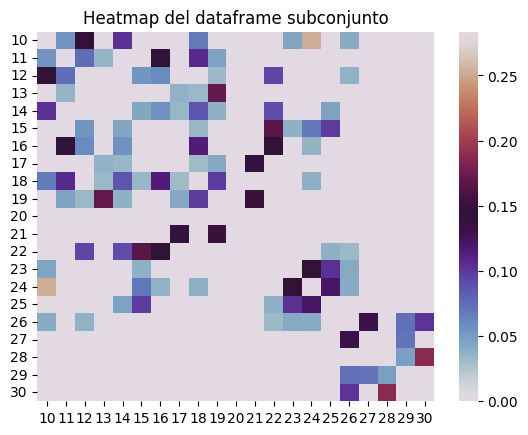

In [9]:
sns.heatmap(subset, cmap='twilight')
plt.title('Heatmap del dataframe subconjunto')
plt.show()

5. Crear el grafo dirigido del nuevo dataframe

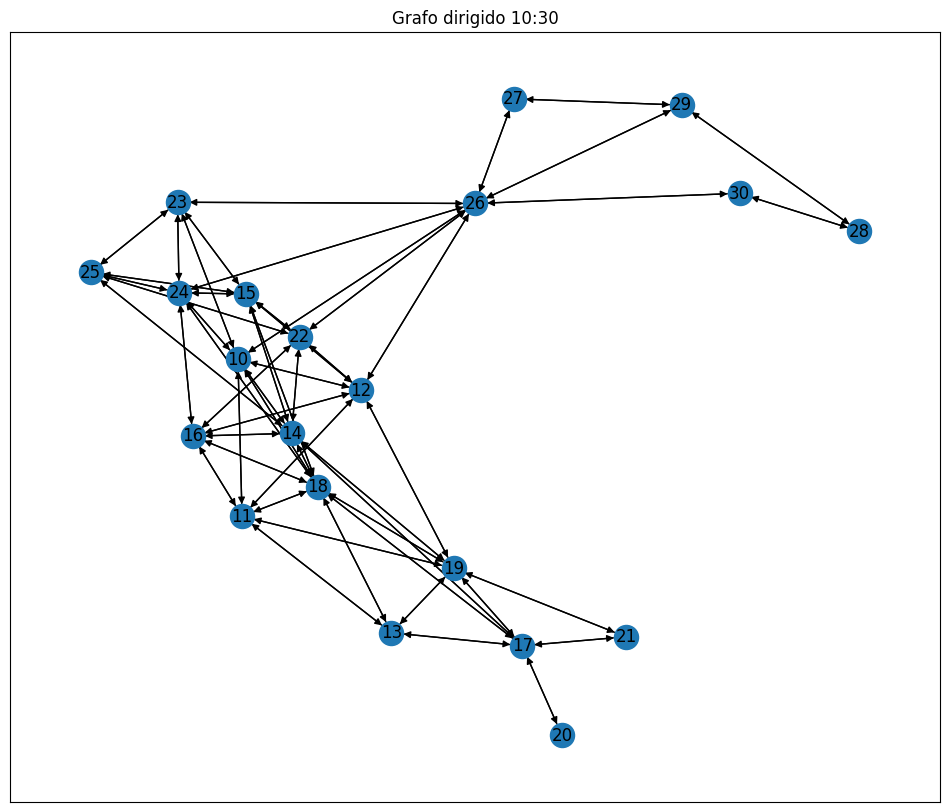

In [10]:
import networkx as nx
df_grafo = pd.DataFrame(subset)
G_grafo = nx.from_pandas_adjacency(df_grafo, create_using=nx.DiGraph())

plt.figure(figsize = (12,10))
pos = nx.spring_layout(G_grafo)
nx.draw_networkx(G_grafo, pos=pos, with_labels=True)

plt.title('Grafo dirigido 10:30')
plt.show()

6. ¿Qué nodo tiene más conexiones del nuevo dataframe?

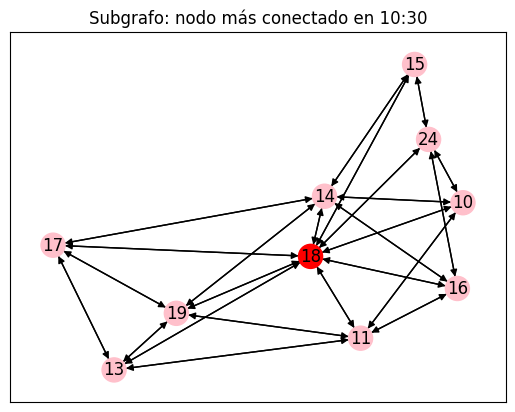

In [11]:
#El nodo que tiene más conexiones es el nodo 18 
G = G_grafo.copy()
nodo_mas_conectado = max(G.degree, key=lambda x: x[1])[0]

grafo_nodo = G.subgraph([nodo_mas_conectado] + list(G.successors(nodo_mas_conectado)) + list(G.predecessors(nodo_mas_conectado)))

pos = nx.spring_layout(grafo_nodo)
#Para ponerle colorcito al nodo más conectado
color_nodo = ['red' if node == nodo_mas_conectado else 'pink' for node in grafo_nodo]

nx.draw_networkx(grafo_nodo, pos=pos, with_labels=True, node_color=color_nodo)

plt.title('Subgrafo: nodo más conectado en 10:30')
plt.show()

7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)

In [12]:
df = pd.DataFrame(data)
quantiles = df.quantile([0.25, 0.5, 0.75], axis=0) 
print(quantiles)

      0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      631  632  633  634  635  636  637  
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 638 columns]


8. Mostrar el histograma de distribución de valores de la matriz de coactivación

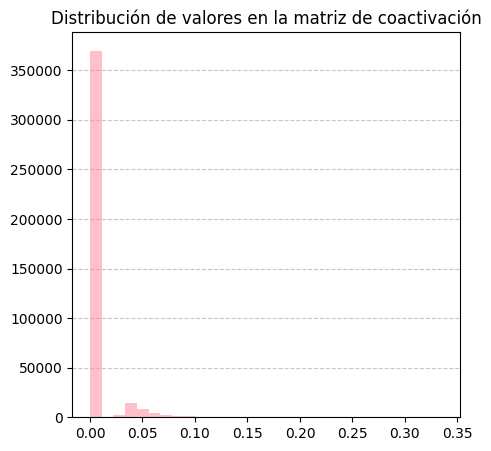

In [27]:
coactivation_matrix = data["Coactivation_matrix"]
values = coactivation_matrix.flatten()

plt.figure(figsize=(5,5))
plt.hist(values, bins=30, color="pink")
plt.title("Distribución de valores en la matriz de coactivación")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

10. Filtre el nuevo dataframe usando como threshold el valor de 0, es decir, binarizar la matriz de coactivación con valores mayores a 0. 

In [46]:
df = pd.DataFrame(quantiles)

df_binarizado = df.map(lambda x: 1 if x > 0 else 0)

print(df_binarizado)

      0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0.25    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
0.50    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
0.75    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      631  632  633  634  635  636  637  
0.25    0    0    0    0    0    0    0  
0.50    0    0    0    0    0    0    0  
0.75    0    0    0    0    0    0    0  

[3 rows x 638 columns]
